In [1]:
import cv2 as cv
import math
import time

In [2]:
import zipfile as zf
files = zf.ZipFile(r'C:\Users\ROSHINI R S\Downloads\modelNweight.zip')
files.extractall(r'C:\Users\ROSHINI R S\Downloads')
files.close()

In [3]:
def getFaceBox(net,frame,conf_threshold=0.7):
  frameOpencvDnn = frame.copy()
  frameHeight = frameOpencvDnn.shape[0]
  frameWidth = frameOpencvDnn.shape[1]
  blob = cv.dnn.blobFromImage(frameOpencvDnn, 1.0, (300,300), [104, 117, 123], True, False)

  net. setInput(blob),
  detections = net.forward()
  bboxes = []
  for i in range(detections.shape[2]):
    confidence = detections[0, 0, i, 2]
    if confidence > conf_threshold:
            x1 = int(detections[0, 0, i, 3] * frameWidth)
            y1 = int(detections[0, 0, i, 4] * frameHeight)
            x2 = int(detections[0, 0, i, 5] * frameWidth)
            y2 = int(detections[0, 0, i, 6] * frameHeight)
            bboxes.append([x1, y1, x2, y2])
            cv.rectangle(frameOpencvDnn, (x1, y1), (x2, y2), (0, 255, 0), int(round(frameHeight/150)), 8)
    return frameOpencvDnn, bboxes



In [4]:
faceProto = r"C:\Users\ROSHINI R S\Downloads\modelNweight\opencv_face_detector.pbtxt"
faceModel = r"C:\Users\ROSHINI R S\Downloads\modelNweight\opencv_face_detector_uint8.pb"

genderProto = r"C:\Users\ROSHINI R S\Downloads\modelNweight\gender_deploy.prototxt"
genderModel = r"C:\Users\ROSHINI R S\Downloads\modelNweight\gender_net.caffemodel"

MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
GenderList = ['Male', 'Female']

genderNet = cv.dnn.readNet(genderModel, genderProto)
faceNet = cv.dnn.readNet(faceModel, faceProto)

In [5]:
padding = 20
def Gender_detector(frame):
    # Read frame
    t = time.time()
    frameFace, bboxes = getFaceBox(faceNet, frame)
    for bbox in bboxes:
        # print(bbox)
        face = frame[max(0,bbox[1]-padding):min(bbox[3]+padding,frame.shape[0]-1),max(0,bbox[0]-padding):min(bbox[2]+padding, frame.shape[1]-1)]
        blob = cv.dnn.blobFromImage(face, 1.0, (227, 227), MODEL_MEAN_VALUES, swapRB=False)
        genderNet.setInput(blob)
        genderPred = genderNet.forward()
        gender = GenderList[genderPred[0].argmax()]

        label = "{}".format(gender)
        cv.putText(frameFace, label, (bbox[0], bbox[1]-10), cv.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 255), 2, cv.LINE_AA)
    return frameFace

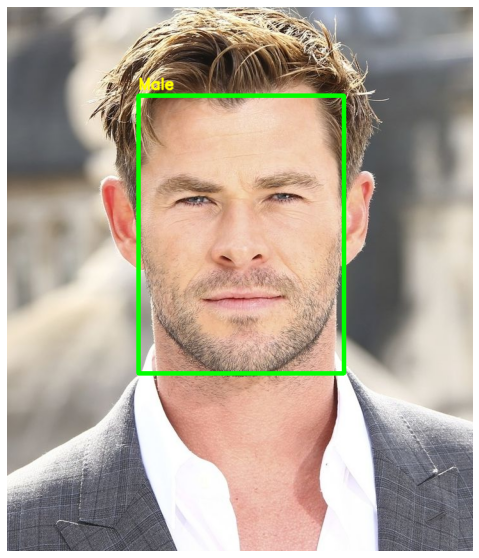

In [6]:
import matplotlib.pyplot as plt
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\M1.jpg")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

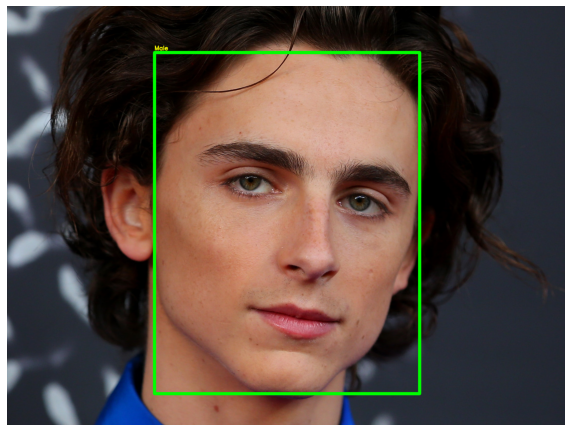

In [7]:
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\M2.jpg")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

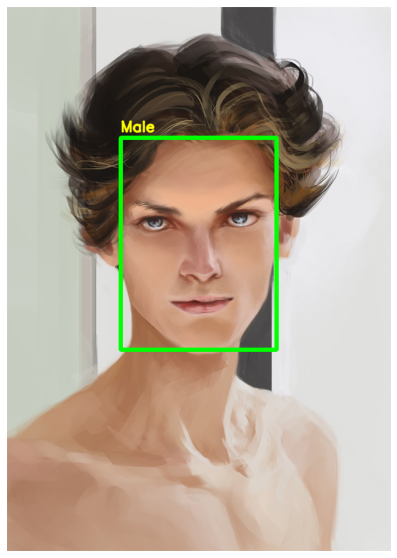

In [8]:
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\M3.jpg")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

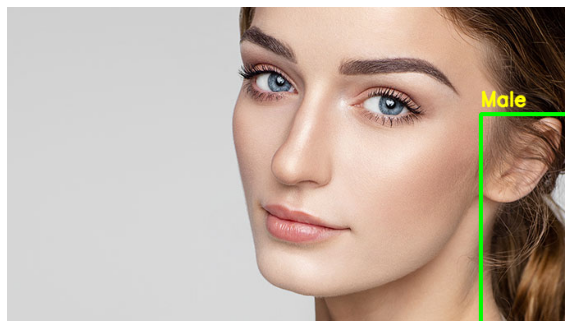

In [9]:
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\F1.jpg")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

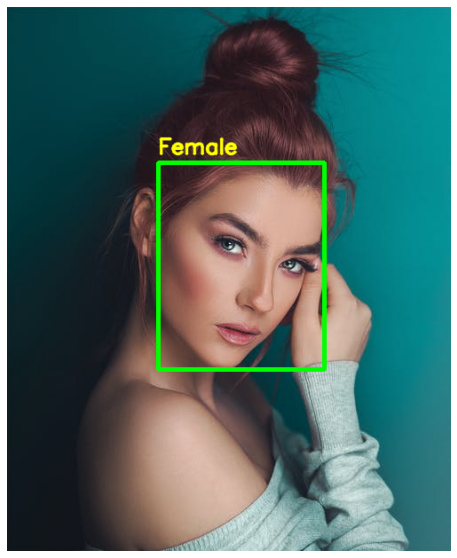

In [10]:
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\F2.jpeg")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

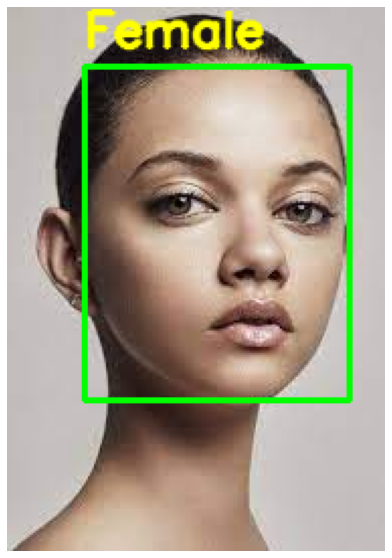

In [11]:
input = cv.imread(r"C:\Users\ROSHINI R S\Downloads\F3.jfif")
output = Gender_detector(input)
# set size
plt.figure(figsize=(10,10))
plt.axis("off")
# convert color from CV2 BGR back to RGB
image = cv.cvtColor(output, cv.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [ ]:
import cv2
  
  
# define a video capture object
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
    # Display the resulting frame
    cv2.imshow('frame',  Gender_detector(frame))
      
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
  
# After the loop release the cap object
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()